<img src="images/quantum_algorithms_tutorials.png" alt="drawing" width="100" align="left"/>

<h2 align="center">
Hamiltonian simulation
</h2>

<h3 align="left">
Introduction
</h3>

Hamiltonian simulation is one of the main subroutines of many quantum algorithms. Moreover, any quantum circuit can be described as a problem of simulating some Hamiltonian. This is because every quantum circuit (without noise effect) can be described by a unitary transformation and for any unitary transformation $U$ we can find a Hamiltonian $H$, such that $U = e^{-iHt}$, where $t$ is a real number. In the circuit model quantum computation, the problem of Hamiltonian simulation can be described in this way: for given $H$ Hamiltonian operator construct $U = e^{iHt}$ circuit. This problem can be described with Schrödinger’s equation: The time evolution of the state of a closed quantum system is described by the Schrödinger equation [[1]]:

$$i \hbar \frac{d}{dt} |\psi \rangle = H |\psi \rangle$$

where $|\psi \rangle$ is the quantum state, $\hbar$ is Plank's constant, $H$ is the Hamiltonian operator. When $H$ doesn't have a dependence on $t$ time (here and after we will consider only time-independent Hamiltonians), the solution of the Schrödinger’s equation will be [[1]]:

$$|\psi(t) \rangle = e^{-iHt} |\psi(0) \rangle$$

Hamiltonian of the closed system is an Hermitian operator [[1]], hence $e^{-iHt}$ is a unitary operator, that can be implemented by quantum gates. Let's say we want to simulate some molecules evolution governed by Schrödinger’s equation with the quantum computer. Hamiltonian simulation can definitely help us in that matter. Moreover, Hamiltonian simulation is widely used as a subroutine in the various quantum algorithms: e.g. the quantum phase estimation algorithm ([[QPE][4]] and [[IQPE][5]], the quantum algorithm for solving linear systems of equations (HHL algorithm), quantum approximate optimization algorithm (QAOA), adiabatic state preparation algorithm and etc. So, it is hard to overestimate the importance of Hamiltonian simulation in quantum computation.

  [1]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [2]: https://quantumcomputing.stackexchange.com/questions/8725/can-arbitrary-matrices-be-decomposed-using-the-pauli-basis
  [3]: https://www.tandfonline.com/doi/abs/10.1080/00268976.2011.552441
  [4]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_phase_estimation.ipynb
  [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
  [6]: https://qiskit.org/documentation/_modules/qiskit/extensions/standard/u1.html
  [7]: https://quantumcomputing.stackexchange.com/a/11391/9459

<h3 align="left">
Constructing a circuit for $e^{iHt}$
</h3>

Any Hermitian (Hamiltonian) matrix $H$ can be decomposed by the sum of Pauli tensor products terms (hereafter Pauli terms) with real coefficients (see this thread in Quantum Computing SE [[2]]). An example of 3 qubit Hamiltonian:

$$H = 11 \sigma_z \otimes \sigma_z + 7 \sigma_z \otimes \sigma_x - 5\sigma_z \otimes \sigma_x \otimes \sigma_y$$

The final circuit for $e^{iHt}$ can be simulated via Trotter decomposition (chapter 4.1 from paper [[1]]):

$$e^{iHt} \approx \big(\prod_k e^{i c_k P_k \Delta t }\big)^{t/ \Delta t}$$

where $P_k$ are the Pauli terms, $c_k$ are the coefficients of the corresponding $P_k$s, $H = \sum_k c_k P_k$. By decreasing $\Delta t$ we can decrease the error of the Trotter decomposition. If all $P_k$ Pauli terms are commuting to each other, then we can take $\Delta t = t$. To understand why we are doing the Trotter decomposition let's consider two commuting Hermitian operators $A$ and $B$ (Pauli terms are Hermitian operators). Let's prove that $e^{i(A+B)t} = e^{iAt}e^{iBt}$ with Taylor series:

$$e^{i(A+B)t} = I + i(A+B)t 
 \frac{\left( i(A+B)t \right)^2}{2!} + \frac{\left( i(A+B)t \right)^3}{3!} + ... = I e^{iBt} + iAt e^{iBt} + \frac{\left(iAt\right)^2}{2!} e^{iBt} = e^{iAt}e^{iBt}$$
 
where

$$e^{iAt} = I + iAt 
 \frac{\left( iAt \right)^2}{2!} + \frac{\left( iAt \right)^3}{3!} + ...
 \\
 e^{iBt} = I + iBt 
 \frac{\left( iBt \right)^2}{2!} + \frac{\left( iBt \right)^3}{3!} + ...$$
 
Here we took into account that, for example, $ABB = BAB = BBA$, because the operators $A$ and $B$ commute $AB = BA$. If this is not true then there will be complications and we will need the Trotterization procedure.

If the Hamiltonian is given in the matrix form and we don't know the corresponding $H = \sum_k c_k P_k$ Pauli decomposition we can find the coefficients $c_k$ of the corresponding Pauli term with the following equality [[2]]:

$$c_k = \frac{1}{2^n}Tr(P_k \cdot H)$$

where $n$ is the qubit number ($Tr(I\otimes I \otimes...\otimes I) = 2^n$). This equality can be proved by taking into account that trace of all Pauli terms are equal to $0$, except for $I\otimes I \otimes...\otimes I$ and 

$$P_k \cdot H = c_k I\otimes I \otimes...\otimes I + \sum_{k' \ne k} P_k \cdot c_{k'} P_{k'}$$

If we will know how to simulate all individual Pauli terms $e^{i c_k P_k t}$ it will be easy to simulate whole Hamiltonian by using Trotter decomposition. Let's start with the simplest one $e^{i \sigma_z \otimes \sigma_z \otimes ... \otimes \sigma_z t}$. Here is the circuit for $e^{i \sigma_z \otimes \sigma_z t}$ from the paper [[3]]

<img src="images/exp_sigma_z.png" alt="drawing" width="200"/>

Here $R_z$'s argument is $-2t$ ($R_z(-2t) = e^{i\sigma_z t}$). Before showing why this is true let's introduce 2 formulas that we will us. 4.2 exercise from [[1]] textbook: Let $t$ be a real number and $A$ a matrix such that $A^2 = I$. Then

$$e^{iA t} = \cos(t) I + i \sin(t) A$$

For all Pauli terms, this $P_k^2 =I$ is true. So we can use this formula. For CNOT gate we have:

$$\mathrm{CNOT} = |0\rangle \langle 0 | \otimes I + |1\rangle \langle 1 | \otimes \sigma_x$$

By taking these formulas into account let's show that the circuit implements the $e^{i \sigma_z \otimes \sigma_z t}$ Pauli term:

\begin{align*}
e^{i \sigma_z \otimes \sigma_z t} = \cos(t) I + i \sin(t) \sigma_z \otimes \sigma_z 
\end{align*}

The circuit:

\begin{align*}
&\mathrm{CNOT} \left(I \otimes e^{i \sigma_z  t}\right) \mathrm{CNOT}= 
\big[|0\rangle \langle 0 | \otimes I + |1\rangle \langle 1 | \otimes \sigma_x \big] \\ 
&\big[ \cos(t) I\otimes I + i \sin(t) I \otimes \sigma_z \big]
\big[|0\rangle \langle 0 | \otimes I + |1\rangle \langle 1 | \otimes \sigma_x \big] = \\
&= \cos(t) I + i \sin(t) \sigma_z \otimes \sigma_z 
\end{align*}

So, the circuit implements what we want:

$$
e^{i \sigma_z \otimes \sigma_z t} =\mathrm{CNOT} \left(I \otimes e^{i \sigma_z  t}\right) \mathrm{CNOT}
$$

The circuit for the $e^{i \sigma_z \otimes \sigma_z \otimes \sigma_z t}$ Pauli term from the same paper [[3]]:

<img src="images/exp_sigma_zz.png" alt="drawing" width="400"/>

The correctness of the circuit can be proved in the same way. Moreover, this solution can be generalized for $e^{i \sigma_z \otimes \sigma_z \otimes ... \otimes \sigma_z t}$ Pauli term. 

Now, what if we have one $\sigma_x$ in the tensor product $P = P_1 \otimes \sigma_x^{(n)} \otimes P_2$, where $P_1$ and $P_2$ are also Pauli terms, $n$ is the qubit number. Note that:

\begin{align*}
e^{iP_1 \otimes \sigma_x^{(n)} \otimes P_2t} &= \cos(t) I + i \sin(t) P_1 \otimes \sigma_x^{(n)} \otimes P_2 = \\
&= \cos(t) I + i \sin(t) P_1 \otimes \left(H \sigma_z^{(n)} H\right) \otimes P_2 = \\
&= H^{(n)} e^{iP_1 \otimes \sigma_z^{(n)} \otimes P_2t} H^{(n)}
\end{align*}

where $H^{(n)}$ is the Hadamard gate acting on $n$th qubit. Here we took into account that $\sigma_x = H \sigma_z H$. The same can be shown for $\sigma_y$:

\begin{align*}
e^{iP_1 \otimes \sigma_y^{(n)} \otimes P_2t} = H_y^{(n)} e^{iP_1 \otimes \sigma_z^{(n)} \otimes P_2t} H_y^{(n)}
\end{align*}

where $H_y$ is a self-inverse gate, which has this nice property $\sigma_y = H_y \sigma_z H_y$: 

$$H_y = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & -i \\
i & -1
\end{pmatrix}
$$

Now, we can simulate any Pauli term. For example, the circuit for $e^{i \sigma_y \otimes \sigma_y \otimes \sigma_x}$ will look like this:

$$e^{i \sigma_y \otimes \sigma_y \otimes \sigma_x} = \big[ H_y \otimes H_y \otimes H \big]  e^{i \sigma_z \otimes \sigma_z \otimes \sigma_z} \big[H_y \otimes  H_y \otimes H\big]  $$

<img src="images/exp_yyx.png" alt="drawing" width="400"/>

By applying appropriate rotations we can bring any Pauli term simulation problem to the simple $e^{i \sigma_z \otimes \sigma_z \otimes ... \otimes \sigma_z t}$ Pauli term simulation problem, whose solution we already know. With this approach, we can simulate any Pauli term, and thus also any Hermitian operator.

  [1]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [2]: https://quantumcomputing.stackexchange.com/questions/8725/can-arbitrary-matrices-be-decomposed-using-the-pauli-basis
  [3]: https://www.tandfonline.com/doi/abs/10.1080/00268976.2011.552441
  [4]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_phase_estimation.ipynb
  [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
  [6]: https://qiskit.org/documentation/_modules/qiskit/extensions/standard/u1.html
  [7]: https://quantumcomputing.stackexchange.com/a/11391/9459

<h3 align="left">
$I$ operators in the Pauli product terms
</h3>

Here we will try to show that we can ignore $I$ operators in the Pauli products when we try to construct circuits for them. For example, we will take $\sigma_z \otimes I \otimes \sigma_z$ operator and show that we can forget about the second qubit and simulate the circuit for $e^{i\sigma_z \otimes \sigma_z t}$ applied on the first and third qubits. We should proof that:

$$e^{i\sigma_z \otimes I \otimes \sigma_z t} = CNOT^{(1,3)}R_z^{(3)}(-2t)CNOT^{(1,3)}$$

For the left side we have:

$$e^{i\sigma_z \otimes I \otimes \sigma_z t} = \cos(t) I \otimes I \otimes I + \sin(t) \sigma_z \otimes I \otimes \sigma_z$$

For the right side:

\begin{align}
&CNOT^{(1,3)}R_z^{(3)}(-2t)CNOT^{(1,3)} = \big[| 0 \rangle \langle 0 | \otimes I \otimes I + | 1 \rangle \langle 1 | \otimes I \otimes X  \big] \\
&\big[ I \otimes I \otimes \big( \cos(t) I + i \sin(t) \sigma_z \big) \big]
\big[ | 0 \rangle \langle 0 | \otimes I \otimes I  + | 1 \rangle \langle 1 | \otimes I \otimes X \big]=
\\
&= \cos(t) I \otimes I \otimes I + \sin(t) \sigma_z \otimes I \otimes \sigma_z
\end{align}

So, they are equal to each other: we can forget about $I$ operator for constructing a circuit in this case. This solution can be generalized for $n$ $I$ operators between two $\sigma_z$ terms.

Also, let's proof that $I \otimes P \otimes I$ can be simulated by $e^{i I \otimes P \otimes I t} = I \otimes e^{i P t} \otimes I$, where $P$ is some Pauli product:

\begin{align}
&e^{i I \otimes P \otimes I t} = \cos(t) I \otimes I \otimes I + i\sin(t) I \otimes P \otimes I 
\\
&= I \otimes \big( \cos(t) I + i \sin(t) P \big) \otimes = I \otimes e^{i P t} \otimes I
\end{align}

In this manner it can be shown for general cases that we can ignore $I$ operators when we simulate Pauli terms in the quantum circuits.

  [1]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [2]: https://quantumcomputing.stackexchange.com/questions/8725/can-arbitrary-matrices-be-decomposed-using-the-pauli-basis
  [3]: https://www.tandfonline.com/doi/abs/10.1080/00268976.2011.552441
  [4]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_phase_estimation.ipynb
  [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
  [6]: https://qiskit.org/documentation/_modules/qiskit/extensions/standard/u1.html
  [7]: https://quantumcomputing.stackexchange.com/a/11391/9459

<h3 align="left">
Controlled version of $e^{iHt}$
</h3>

Often in the algorithms (e.g. in HHL or PEA), we want to construct not the circuit for Hamiltonian simulation $e^{iHt}$, but the controlled version of it. First of all, note that if we have $ABC$ circuit, where $A$, $B$ and $C$ are operators, then the controlled version of that circuit will equal $cA$ $cB$ $cC$, where $c$ denotes control version of an operator. We already know that $e^{iHt}$ consists of $e^{iPt}$ terms, where $P$ is some Pauli product. So, for solving the problem we should find a way for constructing controlled versions of $e^{iPt}$ terms. Here is a general form for the circuit that implements any given $e^{iPt}$ and the controlled version of it (like was done similarly in this paper [[3]]):

<img src="images/exp_pauli_and_controled.png" alt="drawing" width="670"/>

where $O_i$ are gates from this set $\{I, H, H_y\}$, and they are chosen differently for each Pauli term. The right circuit in the picture implements the controlled version of the $e^{iPt}$, because, if control qubit is in the $|0\rangle$ state the $R_z$ gate will not work and the rest gates will cancel each other (they are self-inverse gates). 

When we are talking about the controlled version of the circuit we shouldn't forget about $e^{iIt}$ term (the global phase in the $e^{iHt}$). We should also construct a circuit that implements controlled version of $e^{iIt}$. Let's call it controlled-global phase ($CGP$) gate and try to implement it. The effect of $CGP$ for controlled qubit $\alpha|0_c\rangle + \beta|1_c\rangle$ acting on multi-qubit $| \psi \rangle$ state:

$$ CGP \left( \alpha|0_c\rangle + \beta|1_c\rangle \right) |\psi\rangle = \left( \alpha|0_c\rangle + e^{it}\beta|1_c\rangle \right) |\psi\rangle$$

where $t$ is the phase. This action can be done just by one Qiskit's [u1][6] phase gate acting on the control qubit [[1]]:

$$u1(t) = \begin{pmatrix} 1 & 0 \\ 0 & e^{it}\end{pmatrix}$$

  [1]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [2]: https://quantumcomputing.stackexchange.com/questions/8725/can-arbitrary-matrices-be-decomposed-using-the-pauli-basis
  [3]: https://www.tandfonline.com/doi/abs/10.1080/00268976.2011.552441
  [4]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_phase_estimation.ipynb
  [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
  [6]: https://qiskit.org/documentation/_modules/qiskit/extensions/standard/u1.html
  [7]: https://quantumcomputing.stackexchange.com/a/11391/9459

<h3 align="left">
The code
</h3>

Before going into Qiskit code, note that:

\begin{equation*}
H_y = u2(\frac{\pi}{2}, \frac{\pi}{2})
\qquad \qquad
H = u2(0, \pi)
\\
u2(\varphi, \lambda) = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & -e^{i\lambda} \\
e^{i\varphi} & e^{i(\varphi + \lambda)}
\end{pmatrix}
\end{equation*}

So, in the code we will use $u2(\frac{\pi}{2}, \frac{\pi}{2})$ gate for implementing $H_y$. For $H$ gate we can use either `.h()` or `.u2()` and for better readability we will use `.h()` in the code.

Firstly we should define what Hamiltonian we want to simulate. Let's do simulation for this Hamiltonian:

$$H = 2 \cdot \sigma_x \otimes \sigma_z \otimes \sigma_x + 5 \cdot \sigma_z \otimes \sigma_y \otimes I + 7 \cdot I \otimes \sigma_y \otimes \sigma_z$$

It can be shown that all three terms commute to each other, thus we can write $e^{iHt}$ in this form:

$$e^{iHt} = e^{i2 \cdot \sigma_x \otimes \sigma_z \otimes \sigma_x t} \; \cdot \; e^{i5 \cdot \sigma_z \otimes \sigma_y \otimes I t} \; \cdot \; e^{i7 \cdot I \otimes \sigma_y \otimes \sigma_z t}$$

This will help us to not worry about the Trotterization procidure and will let us to draw simpler circuit at the end. Here we start coding:

In [1]:
from qiskit import *
import numpy as np

In [2]:
def exp_all_z(circuit, quantum_register, pauli_idexes, control_qubit=None, t=1):
    """
    The implementation of exp(iZZ..Z t), where Z is 
    the Pauli Z operator, t is a parameter.
    :param circuit: QuantumCircuit.
    :param quantum_register: QuantumRegister.
    :param pauli_idexes: the indexes from quantum_register
                         that correspond to not I entries: 
                         e.g. if we have XIYZI then the 
                         pauli_idexes = [0,2,3].
    :param control_qubit: a Qubit from QuantumRegister
                          other then quantum_register.
    :param t: the parameter t in exp(iZZ..Z t).
    """
    if control_qubit is not None:
        circuit.add_register(control_qubit.register)
        # the simple cases
        if len(pauli_idexes) == 0:
            circuit.u1(t, control_qubit)
            return

    # the actual implementation of exp(iZZ..Z t)
    for i in range(len(pauli_idexes) - 1):
        circuit.cx(quantum_register[pauli_idexes[i]],
                   quantum_register[pauli_idexes[i + 1]])

    if control_qubit is None:
        circuit.rz(-2 * t, quantum_register[pauli_idexes[-1]])
    else:
        circuit.crz(-2 * t, 
                    control_qubit, quantum_register[pauli_idexes[-1]])

    for i in reversed(range(len(pauli_idexes) - 1)):
        circuit.cx(quantum_register[pauli_idexes[i]],
                   quantum_register[pauli_idexes[i + 1]])

In [3]:
def exp_pauli(pauli, quantum_register, control_qubit=None, t=1):
    """
    The circuit for the exp(i P t), where P is a Pauli product, 
    t is a parameter.
    :param pauli: string that specifies the Pauli: e.g. "XIXY"
    :param quantum_register: QuantumRegister
    :param control_qubit: a Qubit from QuantumRegister other 
                          then quantum_register.
    :param t: the parameter t in eexp(i P t).
    :return: QuantumCircuit that implements exp(i P t) or control
             version of it.
    """
    if len(pauli) != len(quantum_register):
        raise Exception("pauli string doesn't match to the quantum register")

    pauli_circuit = QuantumCircuit(quantum_register)
    circuit_bracket = QuantumCircuit(quantum_register)
    pauli_idexes = []

    for i in range(len(quantum_register)):
        if pauli[i] == 'I':
            continue
        elif pauli[i] == 'Z':
            pauli_idexes.append(i)
        elif pauli[i] == 'X':
            circuit_bracket.h(quantum_register[i])
            pauli_idexes.append(i)
        elif pauli[i] == 'Y':
            circuit_bracket.u2(np.pi / 2, np.pi / 2, quantum_register[i])
            pauli_idexes.append(i)

    pauli_circuit += circuit_bracket
    exp_all_z(pauli_circuit, quantum_register, pauli_idexes, control_qubit, t)
    pauli_circuit += circuit_bracket

    return pauli_circuit

In [4]:
def hamiltonian_simulation(hamiltonian, quantum_register=None, control_qubit=None, t=1, trotter_number=1):
    """
    The implementation of exp(iHt), where H is the Hamiltonian 
    operator, t is a parameter.
    :param hamiltonian: Dictionary of Pauli terms with their weights: 
                        e.g. {"XZX": 2, "ZYI": 5, "IYZ": 7}
    :param quantum_register: QuantumRegister
    :param control_qubit: a Qubit from QuantumRegister other then
                          quantum_register.
    :param t: the parameter t in eexp(iHt).
    :param trotter_number: the number for the Trotterization procedure.
    :return: QuantumCircuit that corresponds to exp(iHt) or control
             version of it.
    """
    if trotter_number < 1:
        raise Exception("trotter_number must be a positive integer")
    if quantum_register is None:
        quantum_register = QuantumRegister(len(list(hamiltonian.keys())[0]))
    if control_qubit in quantum_register:
        raise Exception("the control qubit is in the target register")

    delta_t = t / trotter_number
    exp_hamiltonian = QuantumCircuit(quantum_register)
    exp_delta_t = QuantumCircuit(quantum_register)

    for pauli in hamiltonian:
        weight = hamiltonian[pauli]
        exp_delta_t += exp_pauli(pauli, quantum_register, control_qubit, weight * delta_t)

    for i in range(trotter_number):
        exp_hamiltonian += exp_delta_t

    return exp_hamiltonian

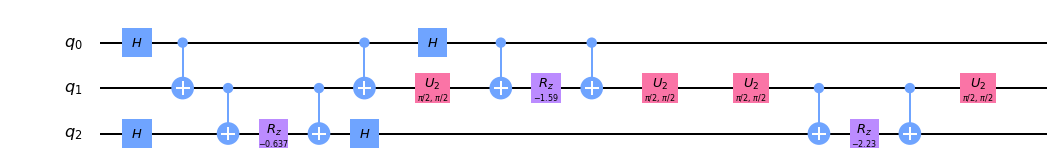

In [5]:
# put the Hamiltonian in the dictionary
hamiltonian = {"XZX": 2, "ZYI": 5, "IYZ": 7}

quantum_register = QuantumRegister(3, 'q')
circuit = hamiltonian_simulation(hamiltonian, quantum_register, t=1/(2*np.pi))

# Let's draw the circuit 
%matplotlib inline
circuit.draw(output="mpl")

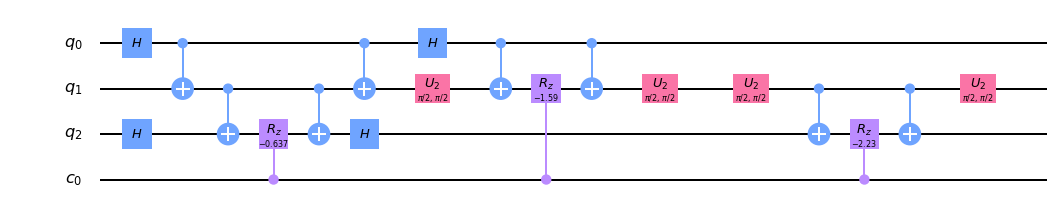

In [6]:
# now the controlled version of the same circuit
control_qubit = QuantumRegister(1, 'c')
control_circuit = hamiltonian_simulation(hamiltonian, quantum_register, 
                                 control_qubit[0], t=1/(2*np.pi))
control_circuit.draw(output="mpl")

Now let's try to simulate/evolve the same Hamiltonian by using Qiskit's `WeightedPauliOperator` and its `evolve` function, that creates the circuit for the Hamiltonian defined in the . This will help us to compare the approuc presented here and built in functionality of Qiskit. Moreover, if the reader is promerly is Qiskit user, then it will be helpfull to know how one can do Hamiltonian simulation with possabilities provided by Qiskit. Here we shold note that the labels of the Pauli terms in `WeightedPauliOperator` looks `"P_{q_2} P_{q_1} P_{q_0}"` label format, where indexes correspond to qubit indexes. Here we haven't used this notation, in the `hamiltonian` dictionary mentioned in the code we used `"P_{q_0} P_{q_1} P_{q_2}"` notation for the labels. So the Hamiltonian in the `WeightedPauliOperator` will be with reversed labels/keys described in our `hamiltonian` dictionary. 

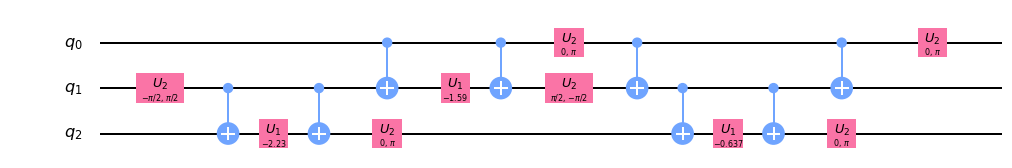

In [7]:
from qiskit.aqua.operators import WeightedPauliOperator
pauli_dict = {
        'paulis': [{"coeff": {"imag": 0.0, "real": 2}, "label": "XZX"},
                   {"coeff": {"imag": 0.0, "real": 5}, "label": "IYZ"},
                   {"coeff": {"imag": 0.0, "real": 7}, "label": "ZYI"}
                   ]
}
hamiltonian = WeightedPauliOperator.from_dict(pauli_dict)
qiskit_evolve_circuit = QuantumCircuit(quantum_register)
qiskit_evolve_circuit = hamiltonian.evolve(quantum_registers=quantum_register, evo_time=-1/(2*np.pi))
qiskit_evolve_circuit = transpile(qiskit_evolve_circuit, basis_gates=['u1', 'u2', 'u3', 'cx'])
qiskit_evolve_circuit.draw(output="mpl")

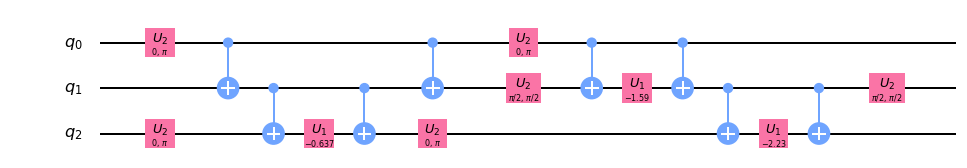

In [9]:
# Let's transpile our previously obtained circuit and draw it
circuit = transpile(circuit, basis_gates=['u1', 'u2', 'u3', 'cx'])
circuit.draw(output="mpl")

As one can see our obtained `hamiltonian_simulation` methode evolves the Pauli terms in reversed order than the Qiskit's `evolve` methode does. The order here is not important, because when we are doing Trotterization the order will not matter. Note that for this specific chosen Hamiltonian the Pauli terms comuting with each other, hence we even don't care about the order and Trotterization. The other difference between this implementations is that, instead $H_Y = U_2(\frac{\pi}{2}, \frac{\pi}{2})$ Qiskit uses $U_2(-\frac{\pi}{2}, \frac{\pi}{2})$ with its conjugate $U_2(\frac{\pi}{2}, -\frac{\pi}{2})$. Note that like $\sigma_y = H_Y \sigma_z H_Y$, the same way:

$$\sigma_y = U_2(-\frac{\pi}{2}, \frac{\pi}{2}) \sigma_z U_2(\frac{\pi}{2}, -\frac{\pi}{2})$$

So, this gates combined are doing the same job as $H_Y$ in our case. $H_Y$ is more preferable because it is self adjoint and we can not worry about the ordering of the gates (the order of apearing of the $U_2(-\frac{\pi}{2}, \frac{\pi}{2})$ and $U_2(\frac{\pi}{2}, -\frac{\pi}{2})$ gates in the circuit is important) as was pointed out [here][7]. In conclusion we can say that `circuit` obtained with our `hamiltonian_simulation` and `qiskit_evolve_circuit` obtained from Qiskit's `evolve` methode are implementing the same evoulution. 

  [1]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [2]: https://quantumcomputing.stackexchange.com/questions/8725/can-arbitrary-matrices-be-decomposed-using-the-pauli-basis
  [3]: https://www.tandfonline.com/doi/abs/10.1080/00268976.2011.552441
  [4]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_phase_estimation.ipynb
  [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
  [6]: https://qiskit.org/documentation/_modules/qiskit/extensions/standard/u1.html
  [7]: https://quantumcomputing.stackexchange.com/a/11391/9459

\[1\] [M.A. Nielsen, I.L. Chuang, Cambridge University Press New York, "Quantum Computation and Quantum Information: 10th Anniversary Edition
10th" (2011)][1]

\[2\] [Quantum computing SE question "Can arbitrary matrices be-decomposed using the pauli basis"][2]

\[3\]  [J.D. Whitfield,  J. Biamonte  and  A. Aspuru-Guzik,
Molecular Physics, "Simulation of electronic structure Hamiltonians using
quantum computers" (2011)][3]

  [1]: https://www.cambridge.org/am/academic/subjects/physics/quantum-physics-quantum-information-and-quantum-computation/quantum-computation-and-quantum-information-10th-anniversary-edition?format=HB
  [2]: https://quantumcomputing.stackexchange.com/questions/8725/can-arbitrary-matrices-be-decomposed-using-the-pauli-basis
  [3]: https://www.tandfonline.com/doi/abs/10.1080/00268976.2011.552441
  [4]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/quantum_phase_estimation.ipynb
  [5]: https://github.com/DavitKhach/quantum-algorithms-tutorials/blob/master/iterative_quantum_phase_estimation.ipynb
  [6]: https://qiskit.org/documentation/_modules/qiskit/extensions/standard/u1.html
  [7]: https://quantumcomputing.stackexchange.com/a/11391/9459